# Univariate Linear regression

Linear Regression is a method used to define a relationship between dependent variable(Y) and independent variable(X) given by
line equation Y=BX+C
Y is dependent variable X is independent , B is the slope and C is the intercept
For linear regression we write it as 
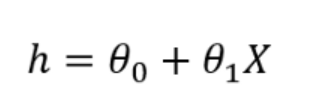

Here, ‘h’ is the hypothesis or the predicted dependent variable, X is the input feature, and theta0 and theta1 are the coefficients. Theta values are initialized randomly to start with. Then using gradient descent, we will update the theta value to minimize the cost function.

# Cost function and gradient Descent

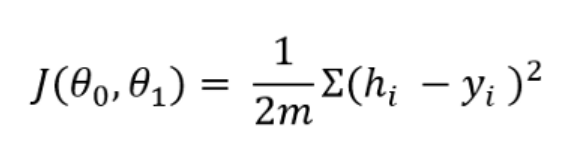


The idea of any machine learning algorithm is to minimize the cost function so that the hypothesis is close to the original dependent variable. We need to optimize the theta value to do that. If we take the partial derivative of the cost function based on theta0 and theta1 respectively, we will get the gradient descent. To update the theta values we need to deduct the gradient descent from the corresponding theta values:
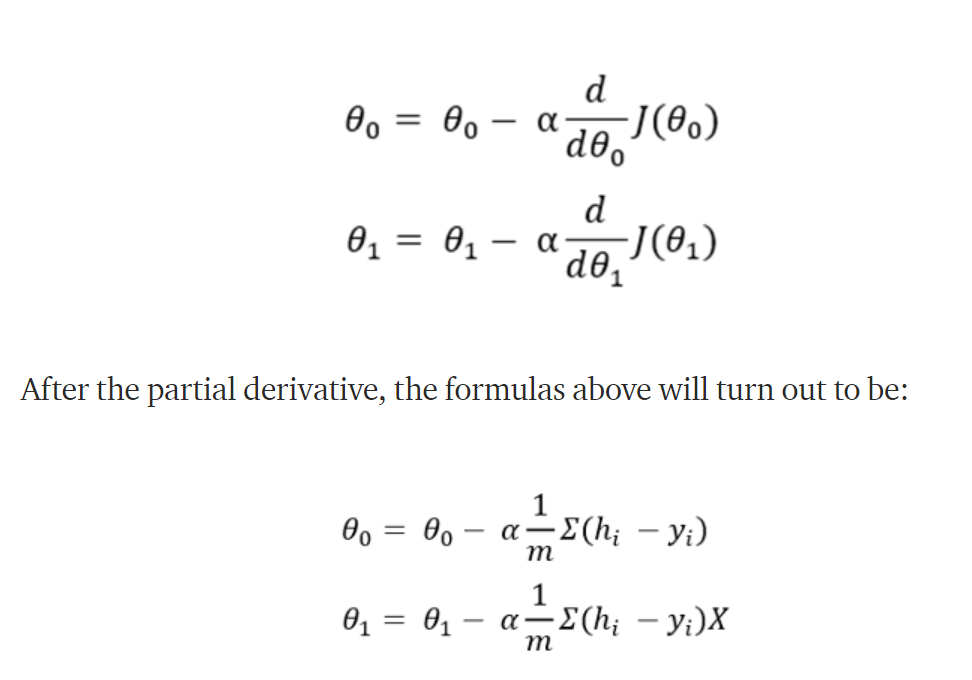

Source: https://towardsdatascience.com/basic-linear-regression-algorithm-in-python-for-beginners-c519a808b5f8

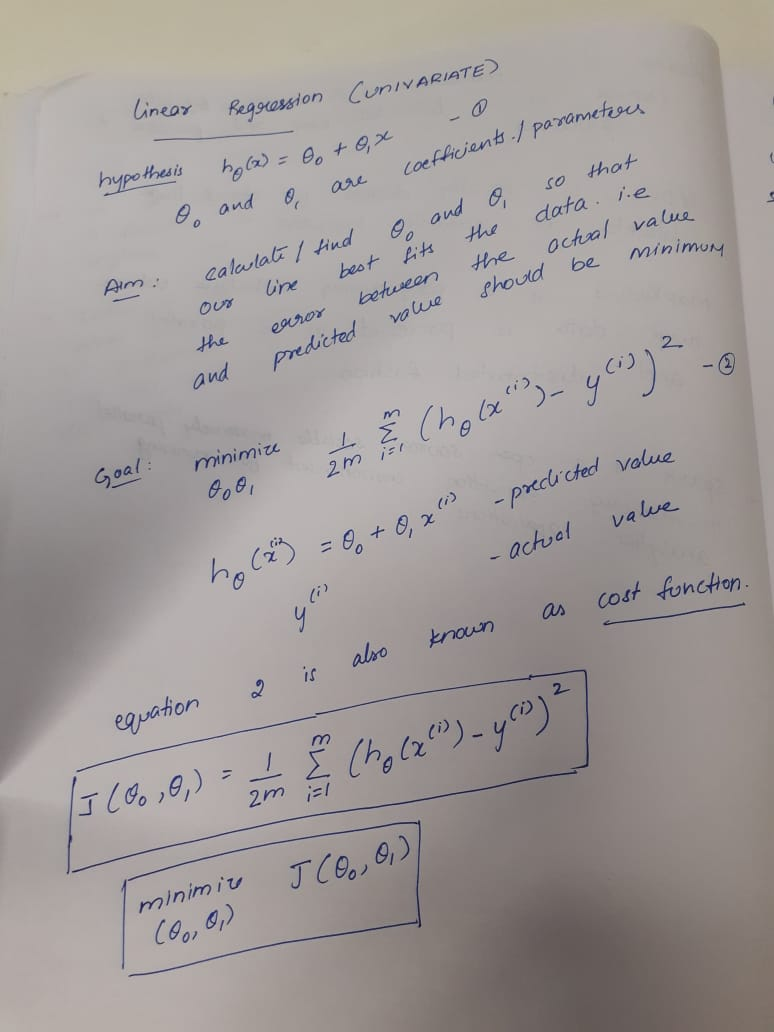

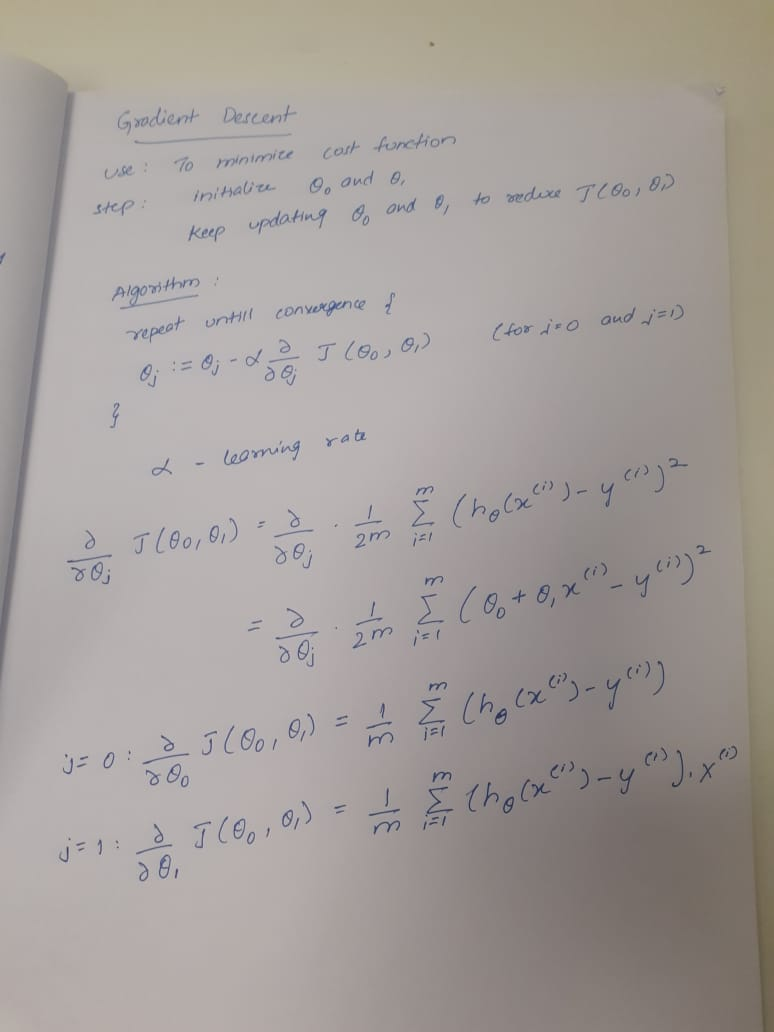

Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read data

In [2]:
columns=['x','y']
data=pd.read_csv(r'C:\Users\satya\Documents\LR.csv',header=None,names=columns)

view data

In [3]:
data

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


plot scatter plot between two variables

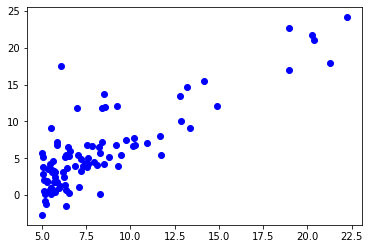

In [4]:
plt.plot(data['x'],data['y'],'bo')

Hypothesis function is used to predicted value(outcome) given theta parameters
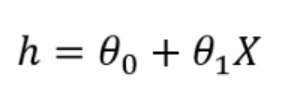

In [5]:
def hypothesis(theta,X):
    return theta[0]+theta[1]*X

Cost function is used to calculate the error(the difference) between actual and predicted and our goal is to minimize the error
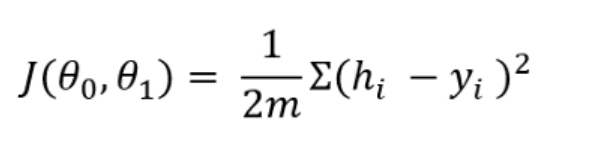

In [6]:
def costfunction(theta,X,y):
    return (1/2*m)*np.sum((hypothesis(theta,X)-y)**2)

We use gradient Descent Algorithm to minimize the error
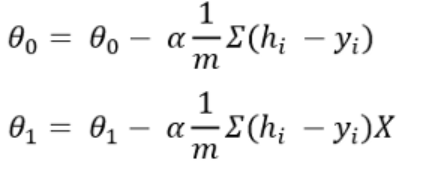

In [7]:
m=len(data)
def gradient_descent(theta,X,y,epoch,alpha):
    cost=[]
    i=0
    while i<epoch:
        hx=hypothesis(theta,X)
        theta[0]-=alpha*(np.sum(hx-y)/m)
        theta[1]-=alpha*(np.sum((hx-y)*X)/m)
        cost.append(costfunction(theta,X,y))
        i+=1
    return theta,cost

In [8]:
def predict(theta,X,y,epoch,alpha):
    theta,cost=gradient_descent(theta,X,y,epoch,alpha)
    return hypothesis(theta,X),cost,theta

In [9]:
theta=[0,0] # initialize theta parameters
y_predict, cost, theta = predict(theta, data['x'], data['y'], 2000, 0.01) #I have set iteration size as 2000 
#and learning rate as 0.01

View the theta parameters(theta0 and theta1)

In [10]:
theta

[-3.78806857272311, 1.1822127747573767]

Calculate the error between actual and predicted

In [11]:
error=np.sum((data['y']-y_predict)**2)

In [12]:
error

868.7373563167141

plot the best fit straight line

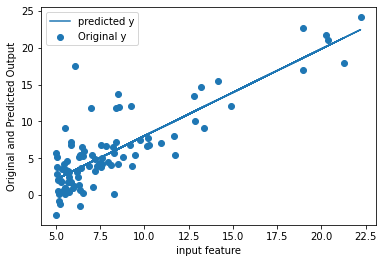

In [13]:
%matplotlib inline
plt.figure()
plt.scatter(data['x'], data['y'], label = 'Original y')
plt.plot(data['x'], y_predict, label = 'predicted y',)
plt.legend(loc = "upper left")
plt.xlabel("input feature")
plt.ylabel("Original and Predicted Output")
plt.show()

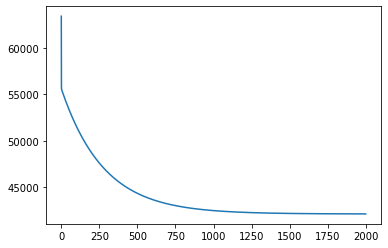

In [14]:
plt.plot(cost) #plot the cost

the cost decreased with iterations

# Calculate theta parameters using normal Equation

In [15]:
one=np.ones(len(data)) #create ones column for the purpose of bias term

In [16]:
data.insert(0,'one',one) 

In [17]:
data

,one,x,y
0,1.0,6.1101,17.59200
1,1.0,5.5277,9.13020
2,1.0,8.5186,13.66200
3,1.0,7.0032,11.85400
4,1.0,5.8598,6.82330
...,...,...,...
92,1.0,5.8707,7.20290
93,1.0,5.3054,1.98690
94,1.0,8.2934,0.14454
95,1.0,13.3940,9.05510


dividing x and y values

In [18]:
newdata=pd.DataFrame(data,columns=['one','x'])

In [19]:
actual=pd.DataFrame(data,columns=['y'])

In [20]:
newdata

,one,x
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598
...,...,...
92,1.0,5.8707
93,1.0,5.3054
94,1.0,8.2934
95,1.0,13.3940


In [21]:
actual

,y
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


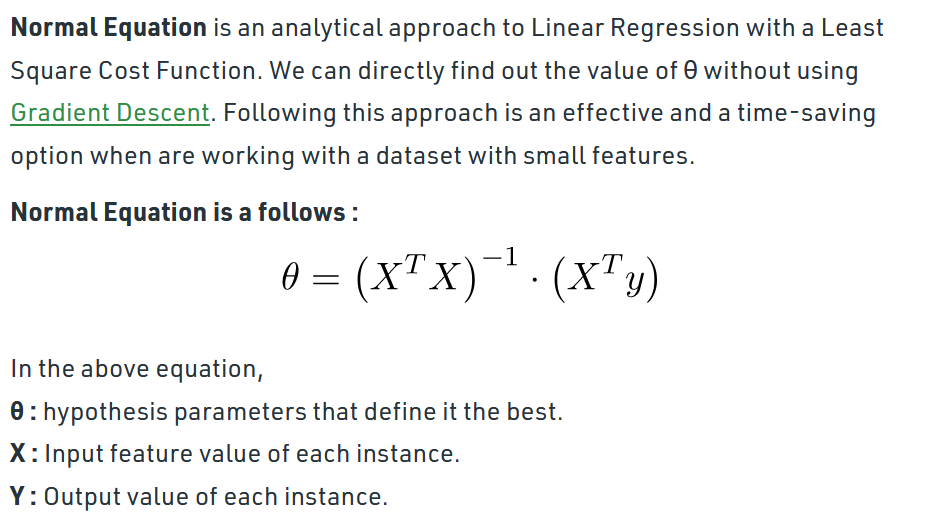

Source: https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/

In [22]:
newdata=newdata.to_numpy() #convert to numpy array

In [23]:
actual=actual.to_numpy()

In [24]:
x_transpose=np.transpose(newdata) #transpose a matrix

In [25]:
x_transpose_dot=x_transpose.dot(newdata) #multiply a matrix

In [26]:
temp_1 = np.linalg.inv(x_transpose_dot) #calculate inverse of  a matrix

In [27]:
temp_2 = x_transpose.dot(actual)

In [28]:
teta=temp_1.dot(temp_2)

In [29]:
teta #theta parameters

array([[-3.89578088],
       [ 1.19303364]])

In [30]:
yhat=newdata.dot(teta) #calculate yhat values which is predicted y

In [31]:
error=np.sum((actual-yhat)**2) #calculate the error between actual and predicted values

In [32]:
error

868.5324469391846

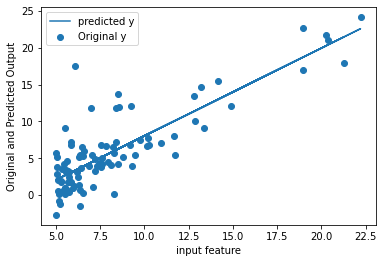

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data['x'], data['y'], label = 'Original y')
plt.plot(data['x'], yhat, label = 'predicted y',)
plt.legend(loc = "upper left")
plt.xlabel("input feature")
plt.ylabel("Original and Predicted Output")
plt.show()

Theta parameters using normal equation formula
array([[-3.89578088],
       [ 1.19303364]])

Theta parametrs using Gradient Descent
[-3.78806857272311, 1.1822127747573767]

Error using Normal equation
868.532447

Error using Gradient Descent
868.7373563167141

Error is approximately similar using both the algorithms.